# Base Modelling

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# Auto ARIMA imports
import pmdarima as pm 
from pmdarima.arima import ADFTest
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./dataset/dollar_exchange_cleaned.csv')

In [3]:
df.head()

,Date,CNY,OMR,IRR,THB,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,SAR,MVR,QAR,MMK,NPR,BND
0,2004-01-01,8.27,0.38,8569.476054,39.24,3.81,180.328936,15312.984436,4.38,107.30,96.65,1311.517255,57.30,0.29,3786.695686,712.35,1.7,45.53,57.694669,55.24,0.71,7622.044314,8336.8,1181.6,161.124825,3.67,0.38,1481.172941,1.344115,3.75,712.35,3.64,6.177686,70.052101,1.69
1,2004-01-02,8.27,0.38,8236.200000,39.53,3.80,180.328936,15147.000000,4.40,106.91,97.04,0.300000,57.10,0.29,3854.100000,712.35,1.7,45.60,57.220000,55.40,0.70,7645.700000,8445.4,1195.8,168.480000,3.67,0.38,1474.100000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68
2,2004-01-05,8.27,0.38,8731.500000,39.26,3.80,180.328936,15148.000000,4.37,106.24,97.25,0.300000,57.10,0.29,3855.000000,712.35,1.7,45.47,57.230000,55.29,0.71,7643.700000,8369.8,1178.9,168.020000,3.67,0.38,1474.600000,1.344115,3.75,712.35,3.64,6.180000,70.620000,1.68
3,2004-01-06,8.27,0.38,8724.700000,39.03,3.80,180.328936,15150.000000,4.37,106.23,97.50,0.300000,57.10,0.29,3852.800000,712.35,1.7,45.55,56.920000,54.85,0.71,7639.000000,8361.8,1189.4,167.550000,3.67,0.38,1473.800000,1.344115,3.75,712.35,3.64,6.180000,70.580000,1.68
4,2004-01-07,8.27,0.38,8728.700000,38.97,3.81,180.328936,15153.000000,4.39,106.18,97.50,0.300000,57.35,0.29,3853.900000,712.35,1.7,45.39,57.240000,54.91,0.71,7641.500000,8369.3,1176.8,167.430000,3.67,0.38,1474.300000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   object 
 1   CNY     4956 non-null   float64
 2   OMR     4956 non-null   float64
 3   IRR     4956 non-null   float64
 4   THB     4956 non-null   float64
 5   MYR     4956 non-null   float64
 6   YER     4956 non-null   float64
 7   VND     4956 non-null   float64
 8   ILS     4956 non-null   float64
 9   JPY     4956 non-null   float64
 10  LKR     4956 non-null   float64
 11  IQD     4956 non-null   float64
 12  PKR     4956 non-null   float64
 13  KWD     4956 non-null   float64
 14  KHR     4956 non-null   float64
 15  UZS     4956 non-null   float64
 16  SGD     4956 non-null   float64
 17  INR     4956 non-null   float64
 18  BDT     4956 non-null   float64
 19  PHP     4956 non-null   float64
 20  JOD     4956 non-null   float64
 21  LAK     4956 non-null   float64
 22  

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.set_index('Date')

In [7]:
df = df.sort_index()

In [8]:
df.head()

,CNY,OMR,IRR,THB,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,SAR,MVR,QAR,MMK,NPR,BND
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,8.27,0.38,8569.476054,39.24,3.81,180.328936,15312.984436,4.38,107.30,96.65,1311.517255,57.30,0.29,3786.695686,712.35,1.7,45.53,57.694669,55.24,0.71,7622.044314,8336.8,1181.6,161.124825,3.67,0.38,1481.172941,1.344115,3.75,712.35,3.64,6.177686,70.052101,1.69
2004-01-02,8.27,0.38,8236.200000,39.53,3.80,180.328936,15147.000000,4.40,106.91,97.04,0.300000,57.10,0.29,3854.100000,712.35,1.7,45.60,57.220000,55.40,0.70,7645.700000,8445.4,1195.8,168.480000,3.67,0.38,1474.100000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68
2004-01-05,8.27,0.38,8731.500000,39.26,3.80,180.328936,15148.000000,4.37,106.24,97.25,0.300000,57.10,0.29,3855.000000,712.35,1.7,45.47,57.230000,55.29,0.71,7643.700000,8369.8,1178.9,168.020000,3.67,0.38,1474.600000,1.344115,3.75,712.35,3.64,6.180000,70.620000,1.68
2004-01-06,8.27,0.38,8724.700000,39.03,3.80,180.328936,15150.000000,4.37,106.23,97.50,0.300000,57.10,0.29,3852.800000,712.35,1.7,45.55,56.920000,54.85,0.71,7639.000000,8361.8,1189.4,167.550000,3.67,0.38,1473.800000,1.344115,3.75,712.35,3.64,6.180000,70.580000,1.68
2004-01-07,8.27,0.38,8728.700000,38.97,3.81,180.328936,15153.000000,4.39,106.18,97.50,0.300000,57.35,0.29,3853.900000,712.35,1.7,45.39,57.240000,54.91,0.71,7641.500000,8369.3,1176.8,167.430000,3.67,0.38,1474.300000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68


In [9]:
sgd_df = pd.DataFrame(df['SGD'])

In [10]:
sgd_df.head()

,SGD
Date,
2004-01-01,1.7
2004-01-02,1.7
2004-01-05,1.7
2004-01-06,1.7
2004-01-07,1.7


In [11]:
sgd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2004-01-01 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SGD     4956 non-null   float64
dtypes: float64(1)
memory usage: 77.4 KB


In [12]:
sgd_df.index[0::1]

DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-05', '2004-01-06',
               '2004-01-07', '2004-01-08', '2004-01-09', '2004-01-12',
               '2004-01-13', '2004-01-14',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=4956, freq=None)

In [13]:
def plot_series(df, col, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))

    plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

## Augmented Dickey-Fuller Test

To commence our analysis with the base model, it is crucial to establish the stationarity of the data. For this purpose, we employ the [Augmented Dickey-Fuller (ADF) Test](https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=The%20ADF%20test%20is%20used,the%20time%20series%20is%20stationary.), which helps us determine the presence of a unit root in the time series. In the event that the null hypothesis is rejected, it signifies that the time series exhibits stationarity.

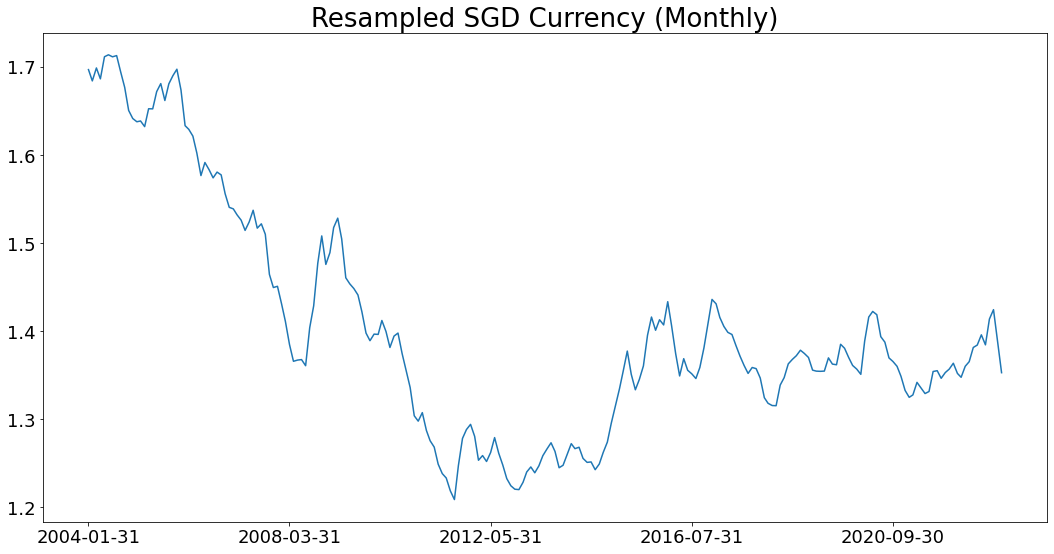

In [14]:
plot_series(sgd_df.resample('M').mean(), 'SGD', title = "Resampled SGD Currency (Monthly)", steps=50)

In [15]:
adf_test = ADFTest(alpha = 0.05)
print(adf_test.should_diff(sgd_df['SGD']))

(0.6306401439763814, True)


Upon careful examination of the resampled graph, it becomes evident that the data exhibits non-stationarity. This finding is further supported by the [Augmented Dickey-Fuller(AFT)](https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=The%20null%20hypothesis%20of%20the,root%20in%20the%20time%20series.) test, where the resulting value of 0.574 fails to provide sufficient evidence to reject the null hypothesis, indicating the non-stationarity of the time series.

To address this issue and ensure the reliability of our analysis, differencing techniques are employed to transform the time series into a stationary form. By implementing differencing, we aim to eliminate the non-stationary behavior, allowing for more robust and meaningful insights to be derived from the data.

In [16]:
sgd_df = sgd_df.resample('M').interpolate().dropna()

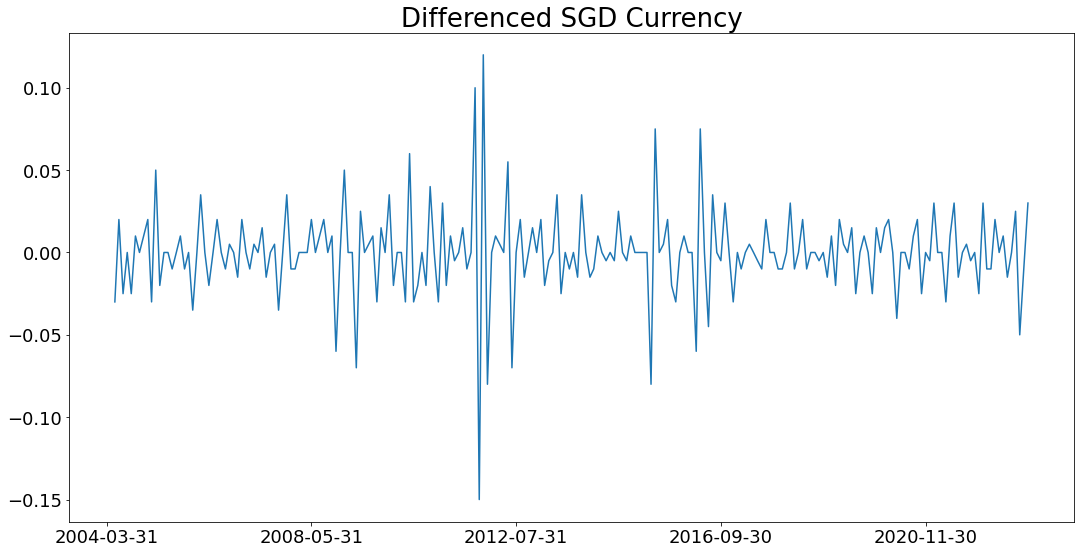

In [17]:
plot_series(sgd_df.diff().diff(), 'SGD', title = "Differenced SGD Currency", steps=50)

In [18]:
diff_series = sgd_df['SGD'].diff().diff().dropna()
print(adf_test.should_diff(diff_series))

(0.01, False)


Following the application of differencing techniques, a significant improvement is observed as the time series transforms into a stationary state. This positive outcome is further supported by the results of the Augmented Dickey-Fuller (ADF) test, where the computed P value of 0.01 confidently falls below the critical threshold of 0.05. Consequently, we can decisively reject the null hypothesis, affirming the stationarity of the time series.

With this encouraging development, we can now proceed with confidence to engage in base modeling, knowing that the underlying data possesses the desirable properties necessary for accurate and meaningful analysis.

In [19]:
diff_series.head()

Date
2004-05-31   -3.000000e-02
2004-06-30    2.000000e-02
2004-07-31   -2.500000e-02
2004-08-31    2.220446e-16
2004-09-30   -2.500000e-02
Freq: M, Name: SGD, dtype: float64

## Base Model: ARIMA

In [20]:
y_train, y_test = train_test_split(diff_series, test_size=.05, shuffle=False)

In [21]:
arima_model = pm.AutoARIMA(start_p=0, max_p=20, 
                           d=None, 
                           start_q=0, max_q=20,
                           trace=True, 
                           random_state=42,
                           n_fits=100
                          )

arima_model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-933.947, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1000.155, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-935.930, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1016.684, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1019.730, Time=0.36 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1031.414, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1037.925, Time=0.29 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=-1036.215, Time=0.48 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1037.155, Time=0.65 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1047.346, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1050.736, Time=0.48 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1054.772, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept

AutoARIMA(max_p=20, max_q=20, n_fits=100, random_state=42, start_p=0, start_q=0,
          trace=True)

Points to note:

1. value of "p" indicates the number of lagged observations included in the model. Each lagged observation is multiplied by a corresponding coefficient, and the sum of these terms is used to estimate the current value.
2. Value of "q" indicates the number of lagged forecast errors included in the model. Each lagged forecast error is multiplied by a corresponding coefficient, and the sum of these terms is used to estimate the current value.


In [22]:
y_pred = arima_model.predict(n_periods = len(y_test))
y_pred

2022-01-31    0.016410
2022-02-28    0.001705
2022-03-31    0.008059
2022-04-30   -0.007386
2022-05-31   -0.001015
2022-06-30    0.006876
2022-07-31   -0.004268
2022-08-31   -0.002383
2022-09-30    0.005344
2022-10-31   -0.001997
2022-11-30   -0.002830
2022-12-31    0.003816
Freq: M, dtype: float64

## Discussion

In [23]:
def plot_forecast(y_train, y_test, arima_model, X_test=None):
    y_pred = arima_model.predict(n_periods = len(y_test), X=X_test) 
    plt.figure(figsize=(30,15))
    plt.plot(y_train, color='blue', label='y_train')
    plt.plot(y_test, color='orange', label='y_test', alpha = 0.7)
    plt.plot(y_pred, color='green', label='y_pred', alpha = 0.9, ls = '--')
    mape = mean_absolute_percentage_error(y_test, y_pred) 
    plt.title(label = f'Currency Predictions\n MAPE: {mape:.2f}', fontsize=16) 
    plt.legend(fontsize = 20, loc = 'upper left'); 

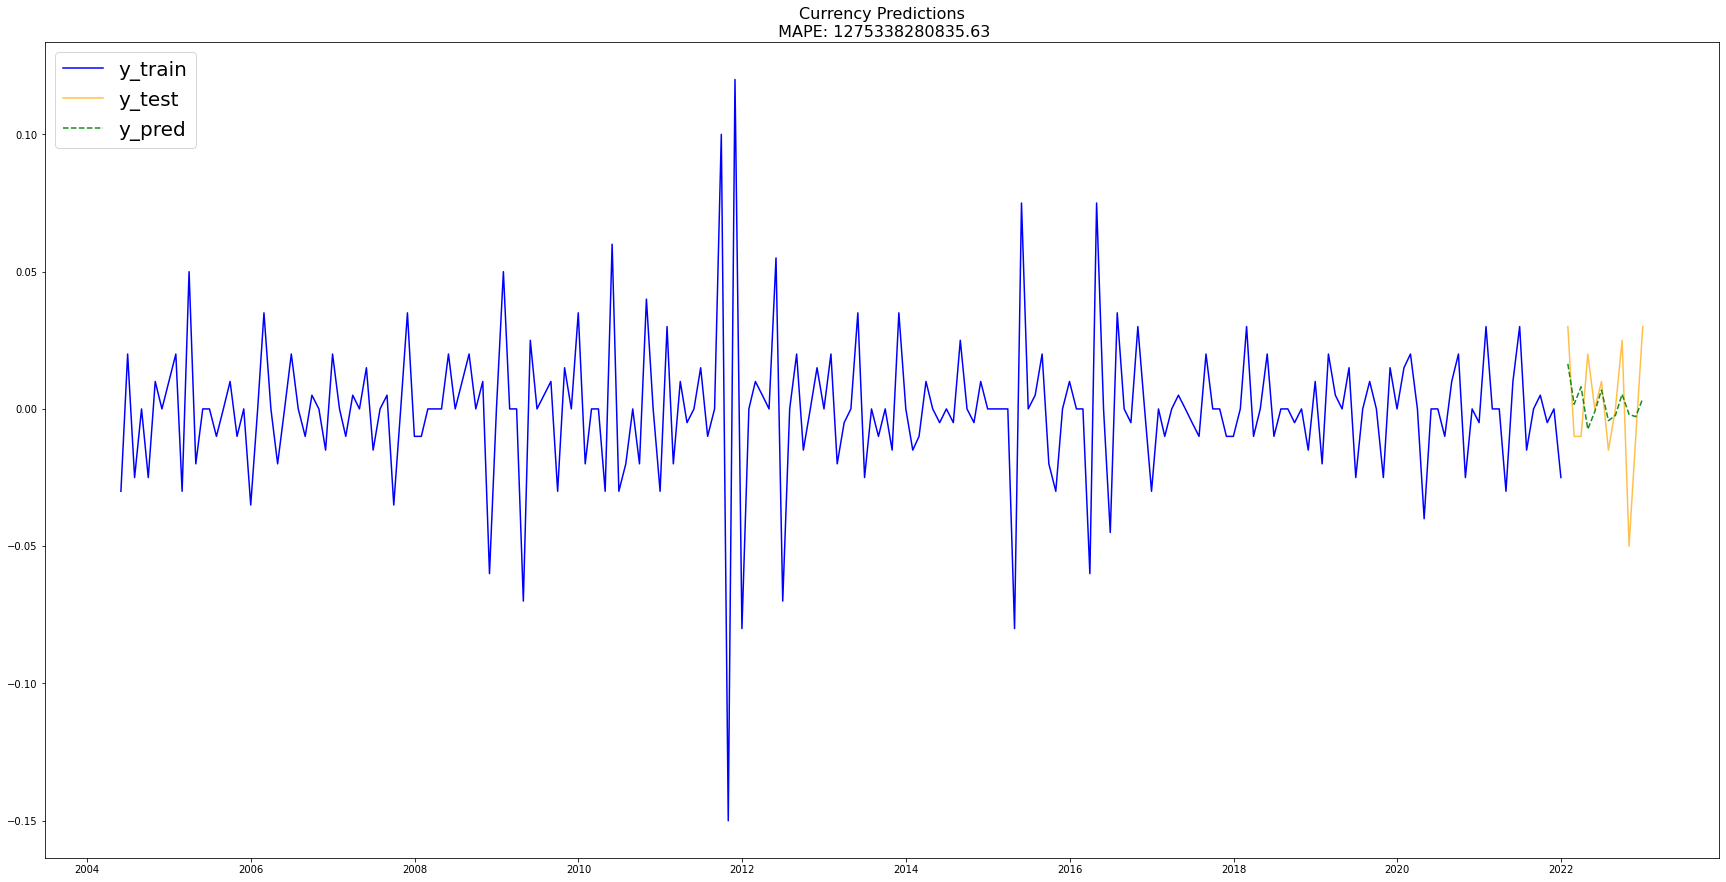

In [24]:
plot_forecast(y_train, y_test,arima_model)

In [25]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

1275338280835.6262


In [26]:
arima_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
arima_rmse 

0.020324589482929926

In the process of ARIMA base modeling, several models were fitted, and after careful evaluation, it was determined that the best model was ARIMA(2,0,3)(0,0,0)[0]. This conclusion was primarily based on the lowest AIC score of -1064.728, indicating a favorable fit of the model to the data. However, it is important to note that despite the promising AIC score, other evaluation metrics must also be taken into consideration.

Upon further analysis, it was observed that the Mean Absolute Percentage Error (MAPE) of the model is relatively high (1275338280835). This indicates that the predictions generated by the ARIMA(2,0,3)(0,0,0)[0] model may not accurately capture the true values of the test cases. Visual examination of the predicted values (depicted in green) compared to the actual test values (depicted in yellow) revealed a discrepancy, with the predictions failing to accurately capture the fluctuations and patterns exhibited by the test data.

These findings suggest that there is room for improvement in the model's predictive capabilities. To enhance the accuracy and reliability of the model, further refinements and adjustments should be made. This could involve exploring alternative model specifications, incorporating additional relevant variables, or applying more advanced modeling techniques. By addressing these areas of improvement, we can strive to enhance the predictive power of the ARIMA base model and achieve more precise forecasts.